In [1]:
# %tensorflow_version 1.x

In [4]:
#!pip install pandas==2.2.2 -q

# Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

C:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 1.5.1


In [3]:
# loading the pre-processed dataset
data = pd.read_csv('loan_prediction_data.csv')

In [4]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [5]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
# checking the data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [7]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [8]:
# looking at the shape of the data
data.shape

(614, 12)

In [9]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [10]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

## 2. Creating training and validation set

In [11]:
# Creating training and validation set
# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [12]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 3. Defining the architecture of the model

In [20]:
#!pip install keras==3.5.0

In [13]:
# checking the version of keras
import keras
print(keras.__version__)

3.5.0


In [54]:
#!pip install --upgrade tensorflow


In [15]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


### a. Create a model



In [16]:
# importing the sequential model
from keras.models import Sequential

### b. Defining different layers

![](download1/png)

In [17]:
# importing different layers from keras
from keras.layers import InputLayer, Dense

In [18]:
# number of input neurons
X_train.shape

(491, 11)

In [19]:
# number of features in the data
X_train.shape[1]

11

In [20]:
# defining input neurons
input_neurons = X_train.shape[1]
input_neurons

11

In [47]:
# number of output neurons

# since loan prediction is a binary classification problem, we will have single neuron in the output layer

In [21]:
# define number of output neurons
output_neurons = 1

In [49]:
# number of hidden layers and hidden neurons

# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [5]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [51]:
# activation function of different layers

# for now I have picked relu as an activation function for hidden layers, you can change it as well
# since it is a binary classification problem, I have used sigmoid activation function in the final layer

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Defining the architecture of the model using the latest Keras API
model = Sequential([
    Input(shape=(input_neurons,)),  # Input layer with specified input shape
    Dense(units=neuron_hidden_layer_1, activation='relu'),  # First hidden layer with ReLU activation
    Dense(units=neuron_hidden_layer_2, activation='relu'),  # Second hidden layer with ReLU activation
    Dense(units=output_neurons, activation='sigmoid')  # Output layer with sigmoid activation
])

# Display the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

110

In [29]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

120

In [28]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [29]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neurons + 1

6

## 4. Compiling the model (defining loss function, optimizer)

In [30]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## 5. Training the model

In [31]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6557 - loss: 0.6893 - val_accuracy: 0.6911 - val_loss: 0.6812
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6521 - loss: 0.6863 - val_accuracy: 0.6911 - val_loss: 0.6728
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6832 - loss: 0.6739 - val_accuracy: 0.6911 - val_loss: 0.6549
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6764 - loss: 0.6524 - val_accuracy: 0.6911 - val_loss: 0.6251
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6504 - loss: 0.6359 - val_accuracy: 0.6911 - val_loss: 0.6030
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6950 - loss: 0.5998 - val_accuracy: 0.6911 - val_loss: 0.5928
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6642 - loss: 0.6114 - val_accuracy: 0.6911 - val_loss: 0.5886
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7182 - loss: 0.5625 - val_accuracy: 0.6911 - val_loss

## 6. Evaluating model performance on validation set

In [32]:
# getting predictions for the validation set
prediction = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [33]:
prediction = np.where(prediction<0.5,0,1)

In [34]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.8130081300813008

### Visualizing the model performance

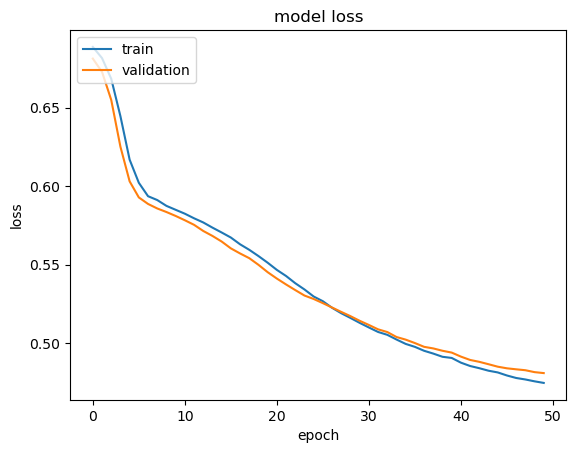

In [35]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

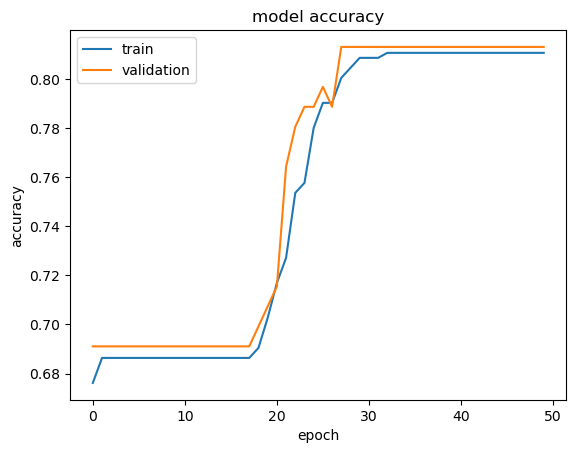

In [36]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()